In [33]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
import random
import albumentations as A


In [28]:
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

In [38]:
from PIL import Image
image = np.array(Image.open('dataset/Resized images/cube17/57.png').convert("RGBA"),
                                     dtype=np.uint8)
mask = np.array(Image.open('dataset/Prediction images - full retina/cube17/57.png').convert("RGBA"),
                dtype=np.uint8)

mask[..., :3] = 255 - mask[..., :3]

is something happening?
is something happening?
is something happening?
is something happening?
is something happening?
is something happening?
is something happening?
is something happening?
is something happening?
is something happening?
is something happening?
is something happening?
is something happening?
is something happening?
is something happening?
is something happening?
is something happening?
is something happening?
is something happening?
is something happening?
is something happening?
is something happening?
is something happening?
is something happening?
is something happening?
is something happening?
is something happening?
is something happening?
is something happening?
is something happening?


c:\users\gabri\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


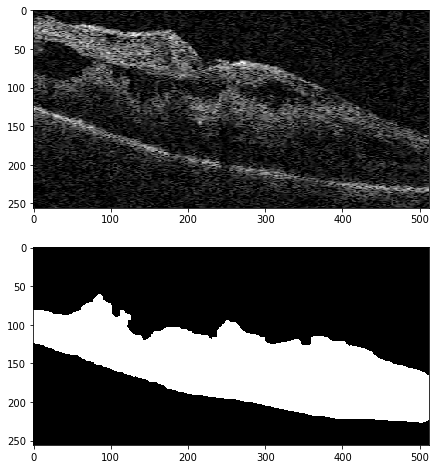

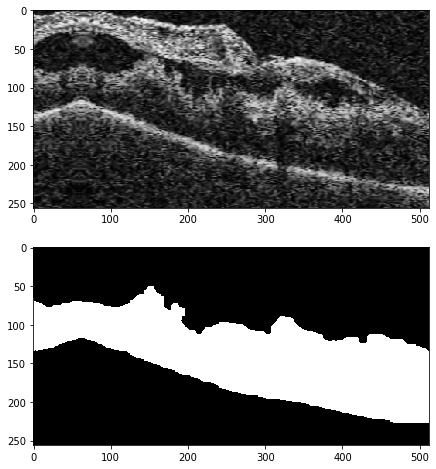

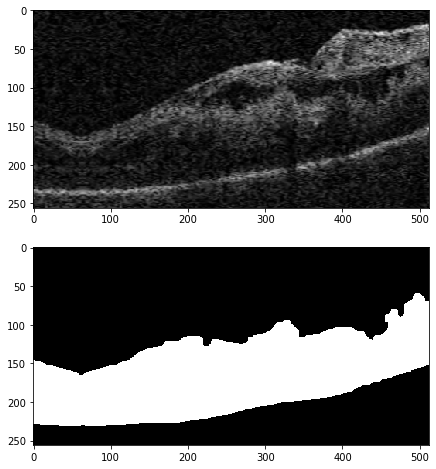

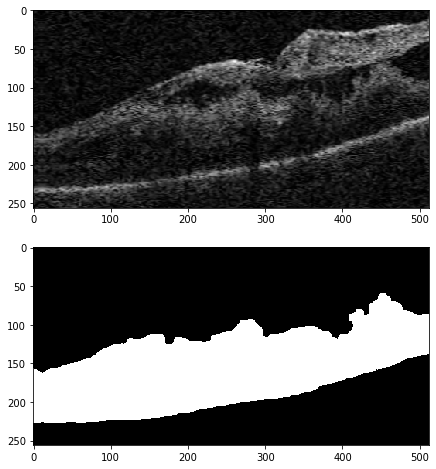

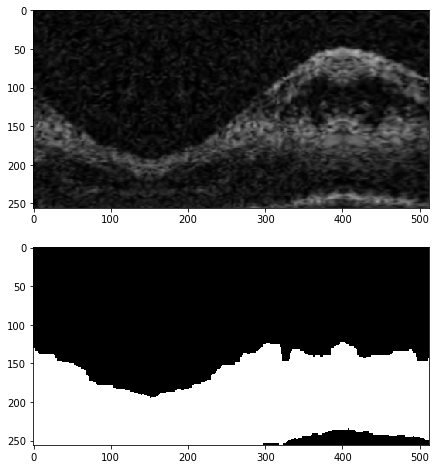

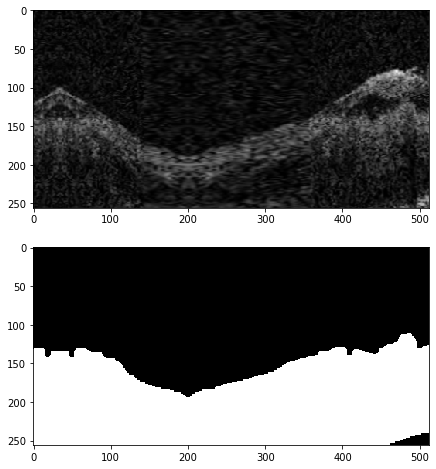

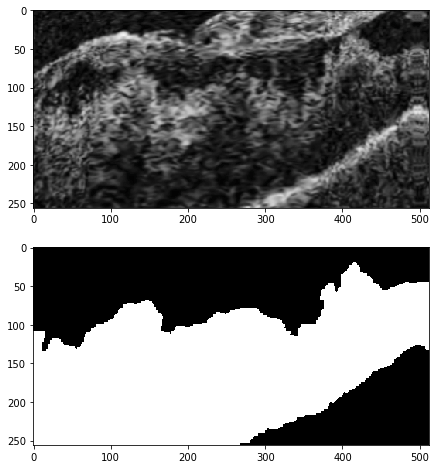

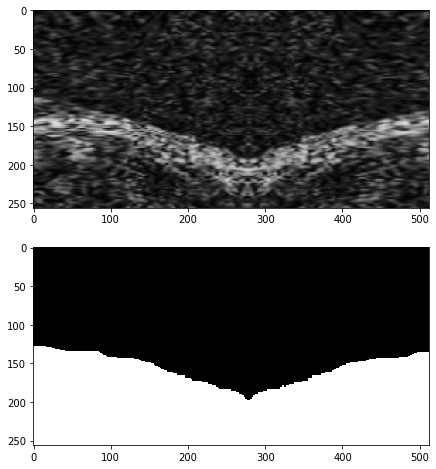

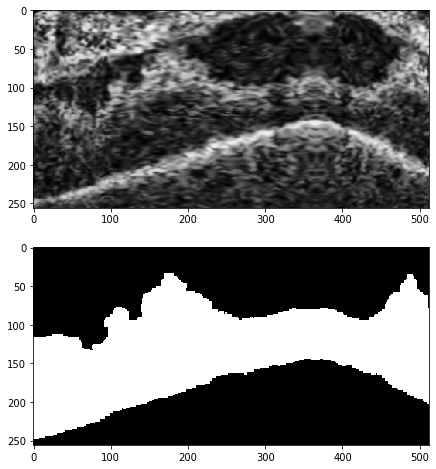

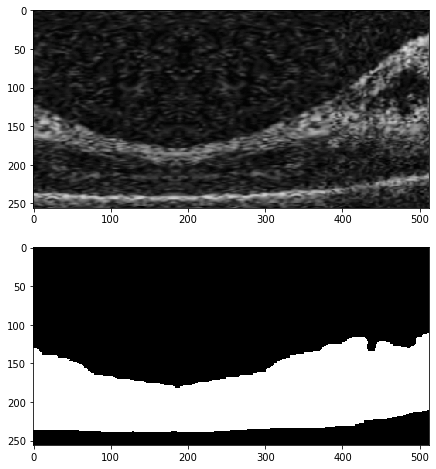

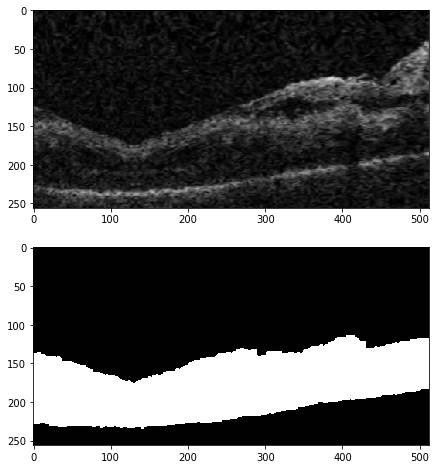

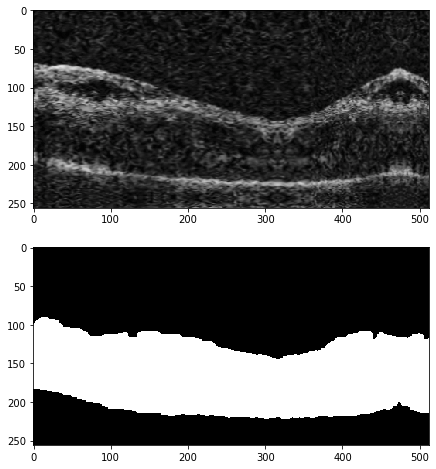

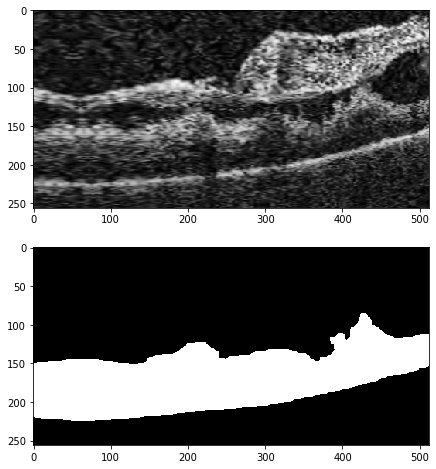

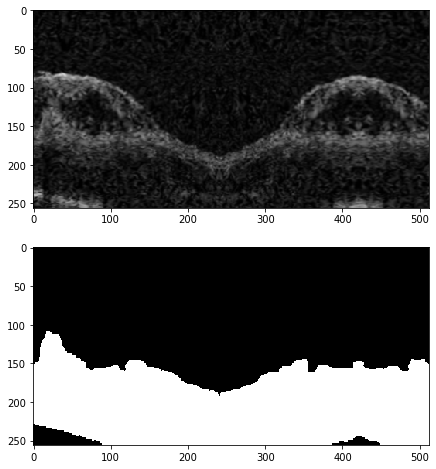

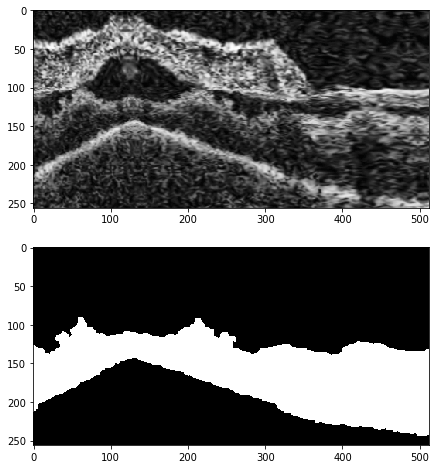

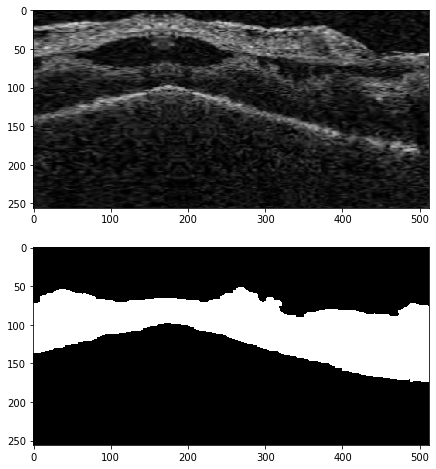

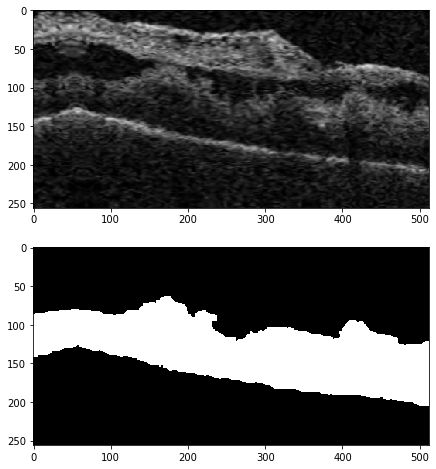

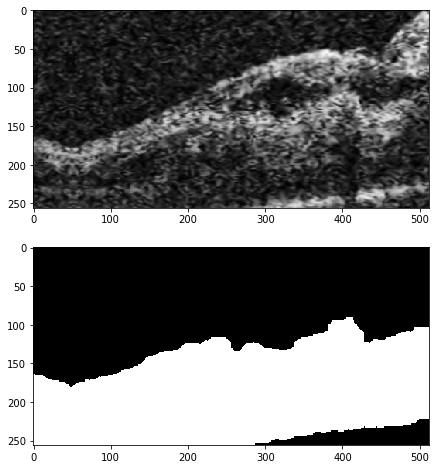

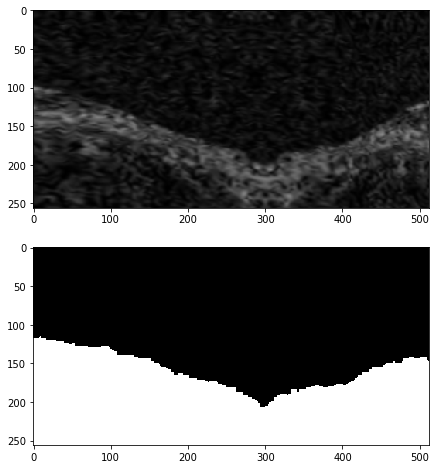

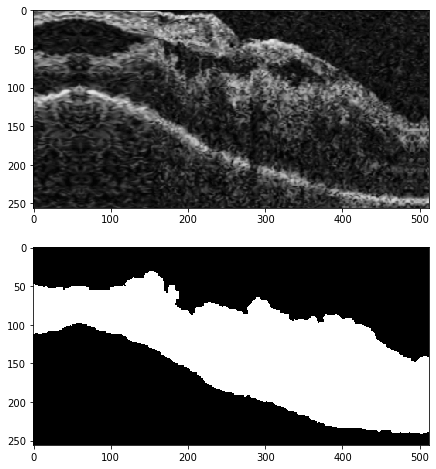

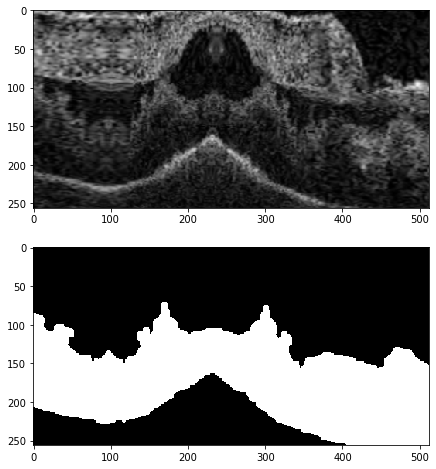

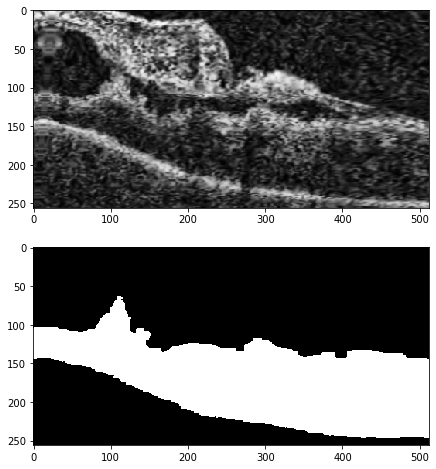

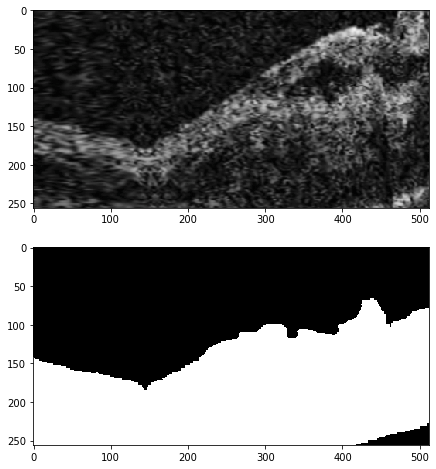

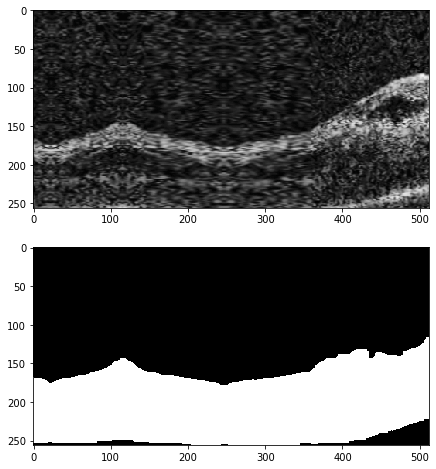

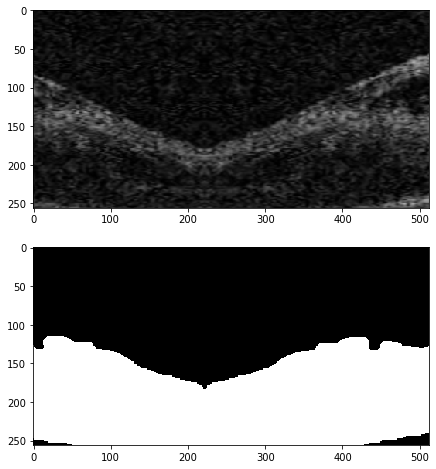

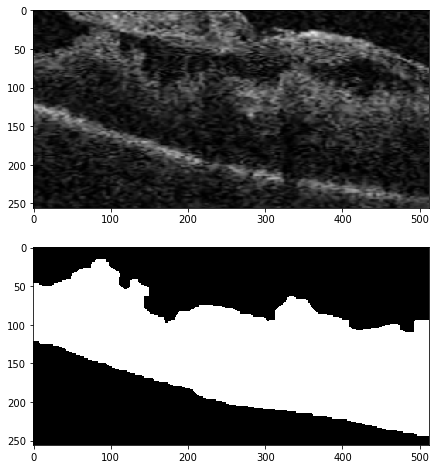

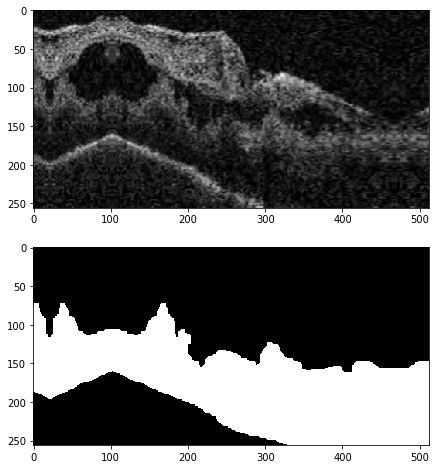

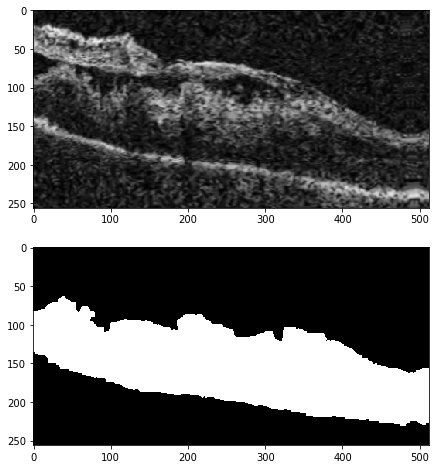

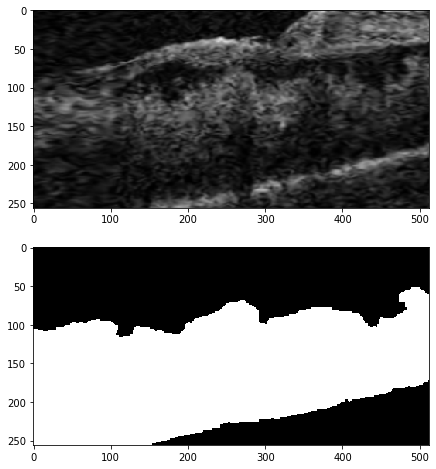

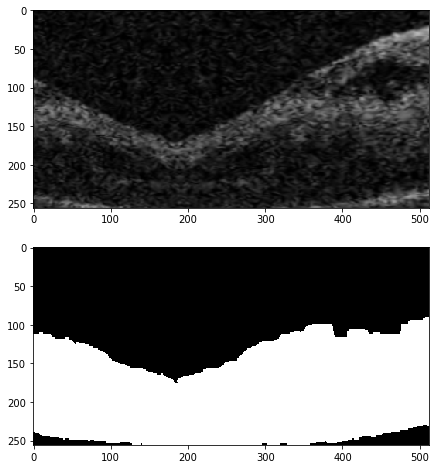

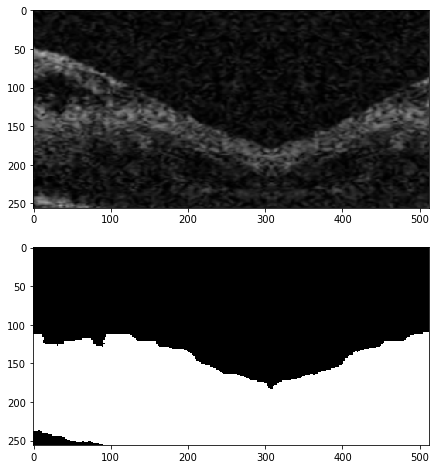

In [46]:
def convert_rgba(image, shape):
    if image.shape[2] == 3:
        return image

    rgb = image[..., :3]
    brightness = image[..., 3, np.newaxis] / 255

    if shape[2] == 1:
        grayscale = np.mean(rgb, axis=2, keepdims=True)
        return np.array(grayscale * brightness, dtype=np.uint8)
    elif shape[2] == 3:
        return np.array(rgb * brightness, dtype=np.uint8)
    else:
        raise Exception("Invalid number of channels!")
    
def convert_segmentations(label, **kwargs):
    non_black_pixels_mask = ~np.all(label == [0, 0, 0, 255], axis=-1)
    label[non_black_pixels_mask] = [255, 255, 255, 255]

    return convert_rgba(label, (label.shape[0], label.shape[1], 3))

aug = A.Compose([
            A.HorizontalFlip(),
            A.IAAAffine(translate_percent={"x": (-1, 1)},
                        mode="reflect",
                        p=1),
            A.PadIfNeeded(min_width=int(image.shape[1] * 2),
                          min_height=image.shape[0]),
            A.GridDistortion(p=0.8, distort_limit=0.5),
            A.ElasticTransform(p=0.5, alpha=10, sigma=100 * 0.03, alpha_affine=0),

            A.CenterCrop(width=image.shape[1], height=image.shape[0]),
            A.IAAPerspective(scale=(0, 0.10), p=1),
            A.ShiftScaleRotate(shift_limit=0,
                               scale_limit=(.0, 0.4),
                               rotate_limit=0,
                               p=0.5),
            A.CLAHE(clip_limit=2.0, p=0.5),
            A.Lambda(
                mask=convert_segmentations,
            ),
            #A.Lambda(image=self.add_background, mask=self.convert_segmentations),
        ])

visualize(image, mask)
for i in range(30):
    print("is something happening?")
    result = aug(image=image, mask=mask)
    visualize(result["image"], result["mask"])